In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(200, 2, centers=2, cluster_std=1.5, random_state=0)

In [4]:
X.shape, y.shape

((200, 2), (200,))

In [5]:
X

array([[ 3.20526229,  1.43210289],
       [ 1.45609398,  1.45274749],
       [ 3.65803162,  0.21758495],
       [ 1.09911198,  0.30175594],
       [ 3.2754389 ,  6.50782548],
       [-0.03242059,  3.76445759],
       [ 1.19233544,  6.48519759],
       [-0.35540854,  1.33259263],
       [ 1.85594666,  0.45097734],
       [-1.46902744,  4.99796071],
       [ 1.16079646,  0.81881272],
       [-0.255928  ,  0.99255665],
       [ 1.54090838,  2.65468614],
       [-0.90292296,  5.47002286],
       [ 2.20185497,  1.77209418],
       [-0.22884442,  3.26946266],
       [-1.32807882, -0.63609661],
       [ 4.25513559,  2.17649157],
       [ 2.83686484,  0.03398171],
       [ 3.31771442,  0.52347579],
       [ 1.0235111 , -0.92345244],
       [-0.99759104,  3.61141042],
       [ 2.62575947,  5.28668292],
       [-0.17860403,  5.11266111],
       [ 3.86068312,  6.52455951],
       [ 0.02250096,  5.31843727],
       [ 1.65366722, -0.79435334],
       [ 1.28868255,  5.76874588],
       [ 1.39388357,

In [6]:
X += 100

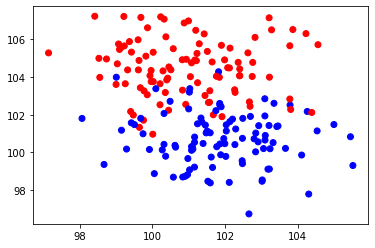

In [8]:
colors = np.array(["red","blue"])
plt.scatter(X[:,0], X[:,1], c=colors[y])

In [10]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)))

0.86


,0,1
0,21,6
1,1,22


In [15]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)))

0.46


,0,1
0,0,27
1,0,23


In [17]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)))

0.66


,0,1
0,10,17
1,0,23


In [18]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)))

0.86


,0,1
0,22,5
1,2,21


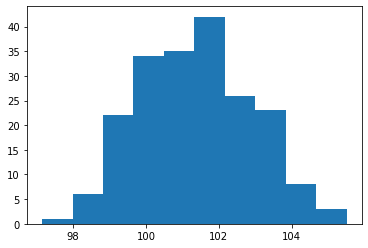

In [19]:
plt.hist(X[:,0])
plt.show()

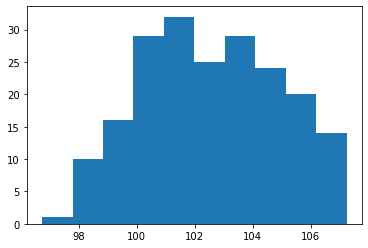

In [20]:
plt.hist(X[:,1])
plt.show()

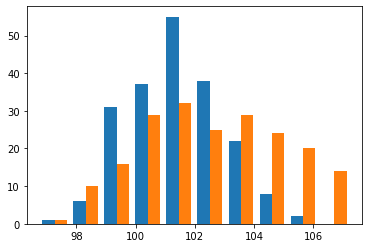

In [21]:
plt.hist(X.flatten())
plt.show()

### Creating words-bag or words-matrix

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
sentences = ["Julia loves John more than Betty", "John loves Bertty more than Julia", "Julia and Betty love John", "Today is raining"]

In [24]:
cv = CountVectorizer()

In [25]:
# word-matrix / words-bag
wm = cv.fit_transform(sentences)
wm

<4x12 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [26]:
cv.get_feature_names_out()

array(['and', 'bertty', 'betty', 'is', 'john', 'julia', 'love', 'loves',
       'more', 'raining', 'than', 'today'], dtype=object)

In [27]:
pd.DataFrame( wm.toarray(), columns=cv.get_feature_names_out())
# "Julia loves John more than Betty" 

,and,bertty,betty,is,john,julia,love,loves,more,raining,than,today
0,0,0,1,0,1,1,0,1,1,0,1,0
1,0,1,0,0,1,1,0,1,1,0,1,0
2,1,0,1,0,1,1,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1


### Creating spam filter

In [32]:
pd.set_option("max_colwidth", None)

df = pd.read_csv("http://51.91.120.89/ML0901/SMSSpamCollection.csv", header=None, sep="\t", names=["label","message"])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [36]:
df.label = df.label.map({"ham":0, "spam":1})

In [37]:
df.head(10)

,label,message
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,0,Even my brother is not like to speak with me. They treat me like aids patent.
7,0,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,1,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,1,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [38]:
df.message.str.replace("[^\w\s]","")

/var/folders/vw/hghg3yv532l62_ccjq89plz00000gn/T/ipykernel_93496/429519205.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.message.str.replace("[^\w\s]","")


0                                                        Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1                                                                                                                                       Ok lar Joking wif u oni
2         Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3                                                                                                                   U dun say so early hor U c already then say
4                                                                                                   Nah I dont think he goes to usf he lives around here though
                                                                                 ...                                                                           
5567    This is the 2nd time we have tri

In [39]:
df.message = df.message.str.replace("[^\w\s]","")

/var/folders/vw/hghg3yv532l62_ccjq89plz00000gn/T/ipykernel_93496/4099761451.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.message = df.message.str.replace("[^\w\s]","")


In [40]:
df.head(10)

,label,message
0,0,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives around here though
5,1,FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send 150 to rcv
6,0,Even my brother is not like to speak with me They treat me like aids patent
7,0,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertune for all Callers Press 9 to copy your friends Callertune
8,1,WINNER As a valued network customer you have been selected to receivea 900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only
9,1,Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camera for Free Call The Mobile Update Co FREE on 08002986030


In [41]:
cv = CountVectorizer()
cv.fit(df.message)
wm = cv.transform(df.message)

In [42]:
wm.toarray().shape

(5572, 9546)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(wm.toarray(), df.label, test_size=0.1, random_state=0)

In [44]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)))

0.982078853046595


,0,1
0,481,0
1,10,67


In [45]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)))

0.9838709677419355


,0,1
0,477,4
1,5,72


In [46]:
# validate filter with real text

In [48]:
s = "extra promo buy now"
wm_sample = cv.transform([s])
model.predict(wm_sample)

array([1])

In [49]:
s = "please call me now"
wm_sample = cv.transform([s])
model.predict(wm_sample)

array([0])

In [50]:
s = "extra promo buy now"
wm_sample = cv.transform([s])
model.predict_proba(wm_sample)

array([[0.46547635, 0.53452365]])

In [51]:
s = "please call me now"
wm_sample = cv.transform([s])
model.predict_proba(wm_sample)

array([[0.82916496, 0.17083504]])